Data Science Project 5 - Predicting Boston Housing Prices.

Nama: Inne Andarini

# 1. Import Library dan Dataset

In [1]:
#Standard libraries for data analysis
import pandas as pd
import numpy as np
from sklearn import metrics #Cek metrik dari model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
column_names = ['CRIM', 'ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 'RAD','TAX','PTRATIO', 'B','LSTAT','MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

# 2. Exploratory Data Analysis

## 2.1 Menampilkan baris pada DataFrame

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 2.2 Menampilkan informasi umum dari DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Variabel-variabel dalam urutan:
1. **CRIM:** Tingkat kejahatan per kapita di kota.
2. **ZN:** Proporsi lahan tinggal yang di-zoning untuk lot lebih dari 25.000 kaki persegi.
3. **INDUS:** Proporsi lahan bisnis non-retail per kota.
4. **CHAS:** Variabel dummy Charles River (= 1 jika suatu daerah berbatasan dengan sungai; 0 jika tidak).
5. **NOX:** Konsentrasi oksida nitrat (bagian per 10 juta).
6. **RM:** Jumlah rata-rata kamar per hunian.
7. **AGE:** Proporsi unit yang ditempati pemilik yang dibangun sebelum tahun 1940.
8. **DIS:** Jarak terbobot ke lima pusat pekerjaan di Boston.
9. **RAD:** Indeks aksesibilitas ke jalan raya radial.
10. **TAX:** Tarif pajak properti nilai penuh per $10.000.

11. **PTRATIO:** Rasio murid-guru per kota.
12. **B:** 1000(Bk - 0,63)^2, di mana Bk adalah proporsi penduduk kulit hitam per kota.
13. **LSTAT:** Persentase status sosial rendah dari populasi.
14. **MEDV:** Nilai median rumah yang ditempati pemilik dalam $1.000.

In [5]:
df.shape

(506, 14)

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 2.3 Data Preparation

**Handling missing values**

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Tidak ada missing values

In [8]:
df['CHAS'].unique()

array([0, 1], dtype=int64)

In [9]:
df['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [10]:
df['RAD'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

In [11]:
df['RAD'].value_counts()

RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

**Mengetahui kolom mana yang cukup berpengaruh terhadap kolom MEDV**

<Axes: >

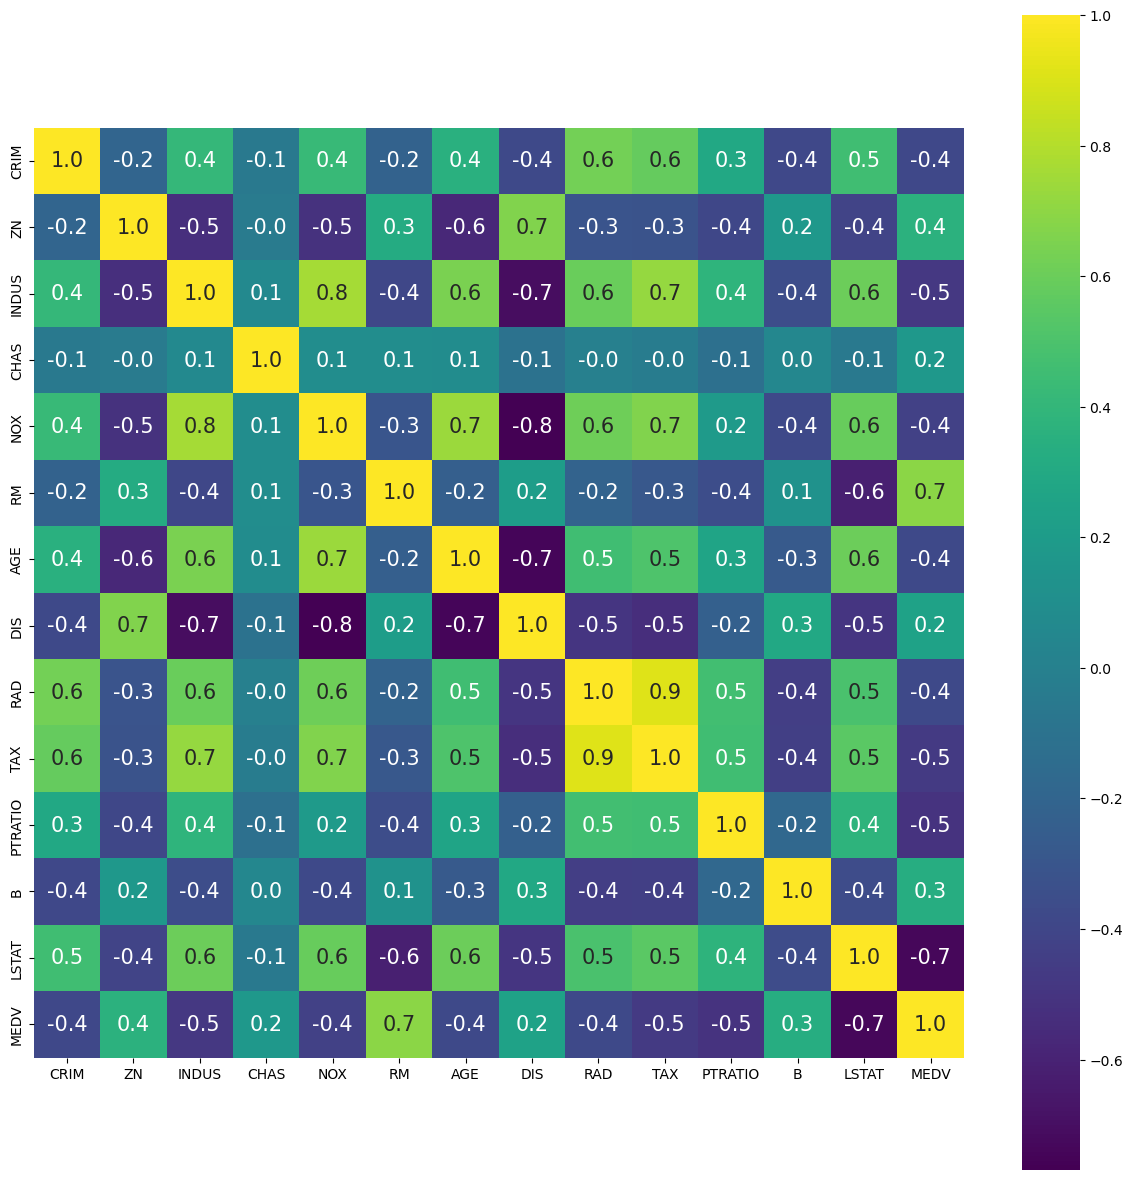

In [12]:
#Mencari korelasi antara variable
corr = df.corr()
corr.shape
#Buat plot untuk correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=True, square=True, fmt ='.1f', annot=True, annot_kws={'size': 15}, cmap='viridis')

In [13]:
sorted_corr = df.corr()['MEDV'].abs().sort_values(ascending=False)
print(sorted_corr)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64


Kolom LSTAT, RM, PTRATIO memiliki korelasi yang cukup besar tehadap variabel target MEDV.

## 2.4 Data Visualization

### 2.4.1 Histogram dari kolom target 'MEDV' dalam df

<Axes: xlabel='MEDV', ylabel='Count'>

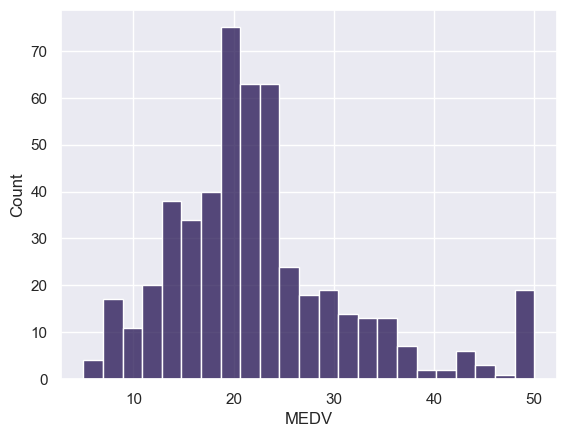

In [14]:
sns.set_theme(palette='magma')
sns.histplot(df['MEDV'])

Nilai 'MEDV' terdistribusi secara normal dengan terdapat sedikit outlier

In [15]:
#Mengukur skewness dan kurtosis
print(f"Skewness: {df['MEDV'].skew()}")
print(f"Kurtosis: {df['MEDV'].kurt()}")

Skewness: 1.1080984082549072
Kurtosis: 1.495196944165818


### 2.4.2 Scatter plot hubungan LSTAT dengan variabel target 'MEDV'

<Axes: xlabel='LSTAT', ylabel='MEDV'>

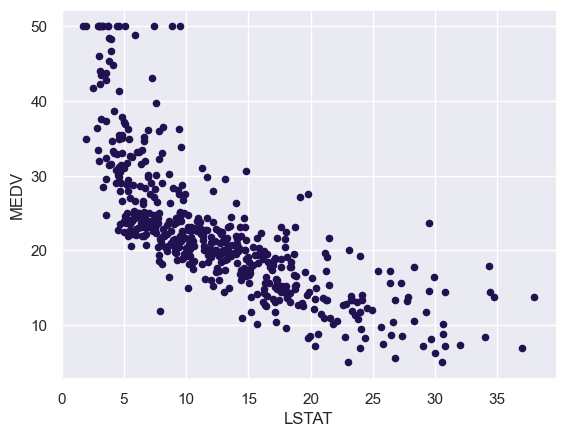

In [16]:
df.plot.scatter(x='LSTAT', y = 'MEDV')

### 2.4.3 Scatter plot hubungan RM dengan variabel target 'MEDV'

<Axes: xlabel='RM', ylabel='MEDV'>

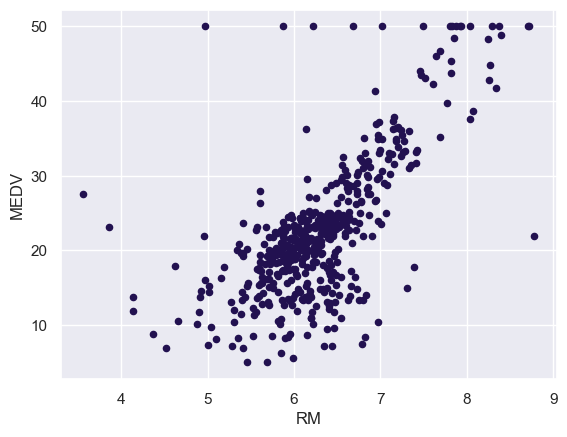

In [17]:
df.plot.scatter(x='RM', y = 'MEDV')

### 2.4.4 Scatter plot hubungan PTRATIO dengan variabel target 'MEDV'

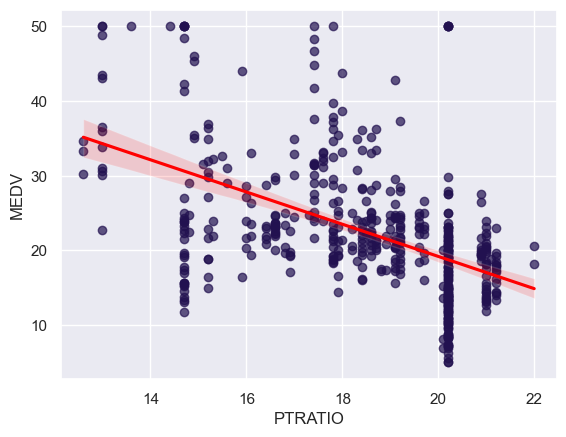

In [18]:
sns.regplot(x='PTRATIO', y='MEDV', data=df, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.show()

### 2.4.5 Mengelola Outlier

In [19]:
data = df.copy()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


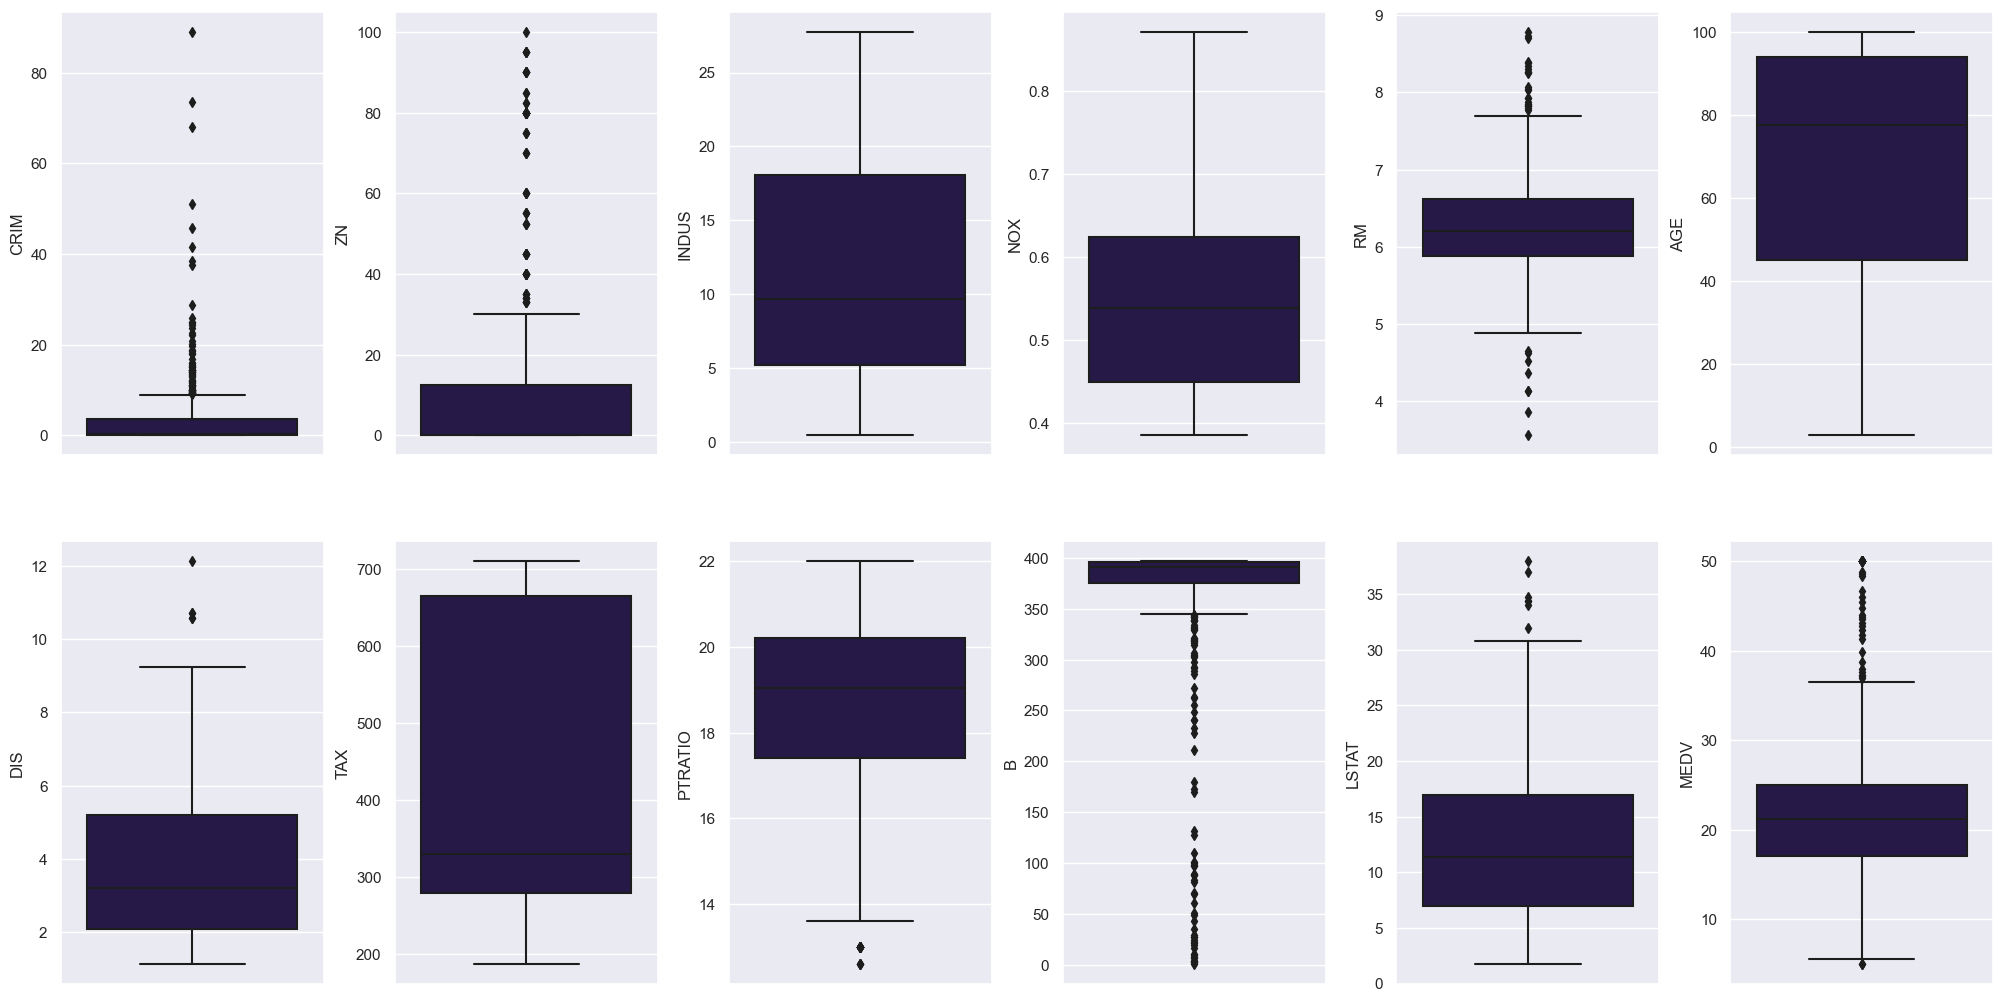

In [21]:
# Select only float columns
float_columns = df.select_dtypes(include=['float64']).columns

# Create box plots for the specified float columns
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col in float_columns:
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In [22]:
print('Jumlah baris yang mengalami outlier:')

for kolom in (data):
  if data[kolom].dtype in ['float64']:
    # Hitung IQR untuk setiap kolom
    q1 = data[kolom].quantile(0.25)
    q3 = data[kolom].quantile(0.75)
    iqr = q3 - q1
        
    # Find outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Cap outliers menggunakan .loc
    data.loc[data[kolom] < lower_bound, kolom] = lower_bound
    data.loc[data[kolom] > upper_bound, kolom] = upper_bound

    # Cetak batas bawah dan atas untuk setiap kolom
    print(f"{kolom}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

# Cetak DataFrame setelah mengatasi outlier
print(data)

Jumlah baris yang mengalami outlier:
CRIM: Lower Bound = -5.31051125, Upper Bound = 9.06963875
ZN: Lower Bound = -18.75, Upper Bound = 31.25
INDUS: Lower Bound = -14.175, Upper Bound = 37.465
NOX: Lower Bound = 0.18650000000000005, Upper Bound = 0.8865
RM: Lower Bound = 4.778499999999999, Upper Bound = 7.730500000000001
AGE: Lower Bound = -28.54999999999999, Upper Bound = 167.64999999999998
DIS: Lower Bound = -2.5322000000000005, Upper Bound = 9.820800000000002
TAX: Lower Bound = -301.5, Upper Bound = 1246.5
PTRATIO: Lower Bound = 13.199999999999998, Upper Bound = 24.4
B: Lower Bound = 344.10624999999993, Upper Bound = 427.49625000000003
LSTAT: Lower Bound = -8.057500000000005, Upper Bound = 31.962500000000006
MEDV: Lower Bound = 5.0624999999999964, Upper Bound = 36.962500000000006
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.96

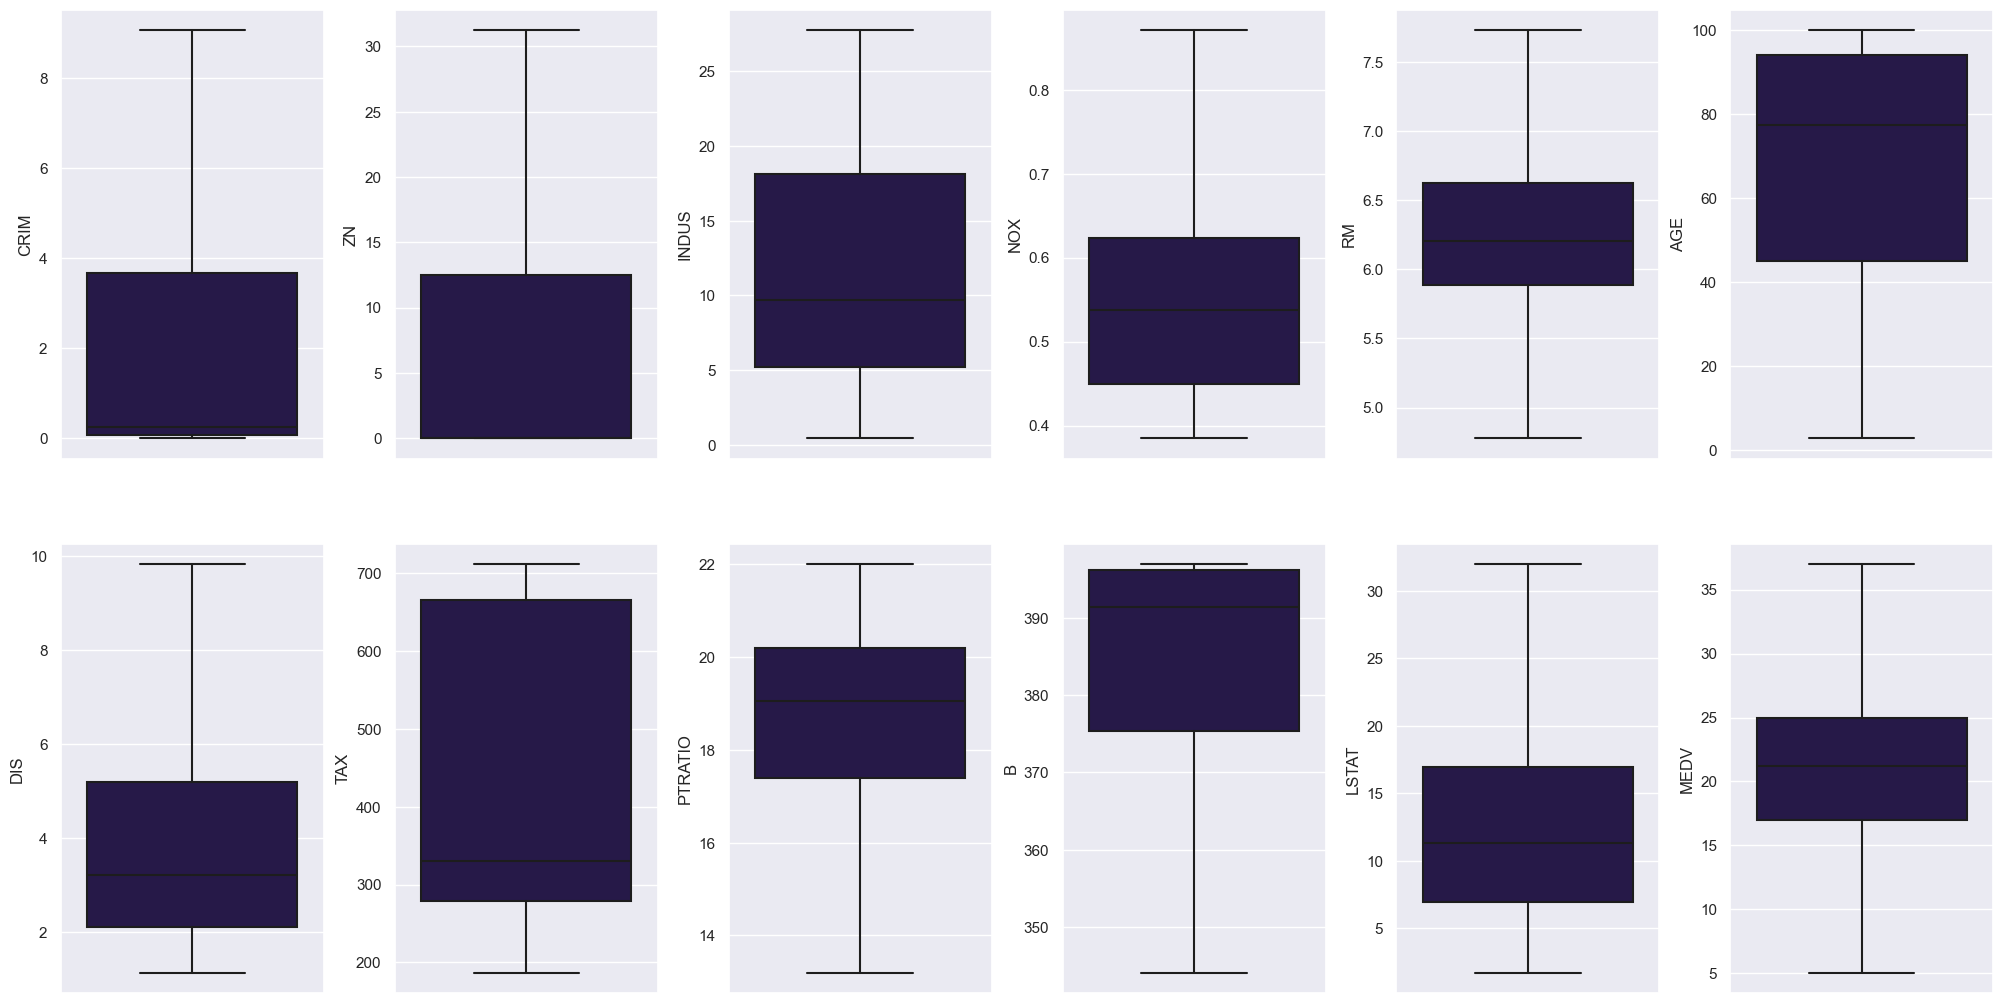

In [23]:
# Select only float columns
float_columns = data.select_dtypes(include=['float64']).columns

# Create box plots for the specified float columns
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col in float_columns:
    sns.boxplot(y=col, data=data, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

<Axes: xlabel='MEDV', ylabel='Count'>

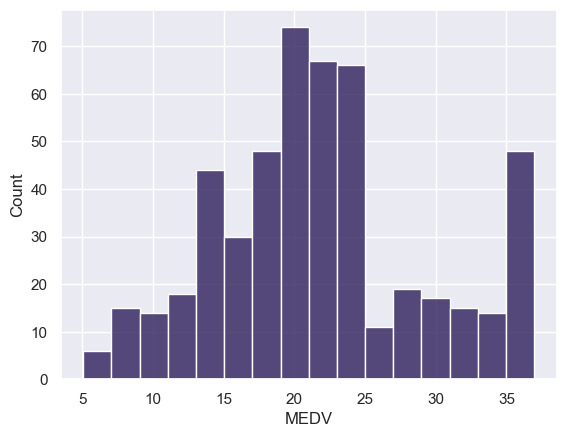

In [24]:
sns.set_theme(palette='magma')
sns.histplot(data['MEDV'])

In [25]:
#Mengukur skewness dan kurtosis
print(f"Skewness: {data['MEDV'].skew()}")
print(f"Kurtosis: {data['MEDV'].kurt()}")

Skewness: 0.35361370415925136
Kurtosis: -0.33443614021963786


<Axes: >

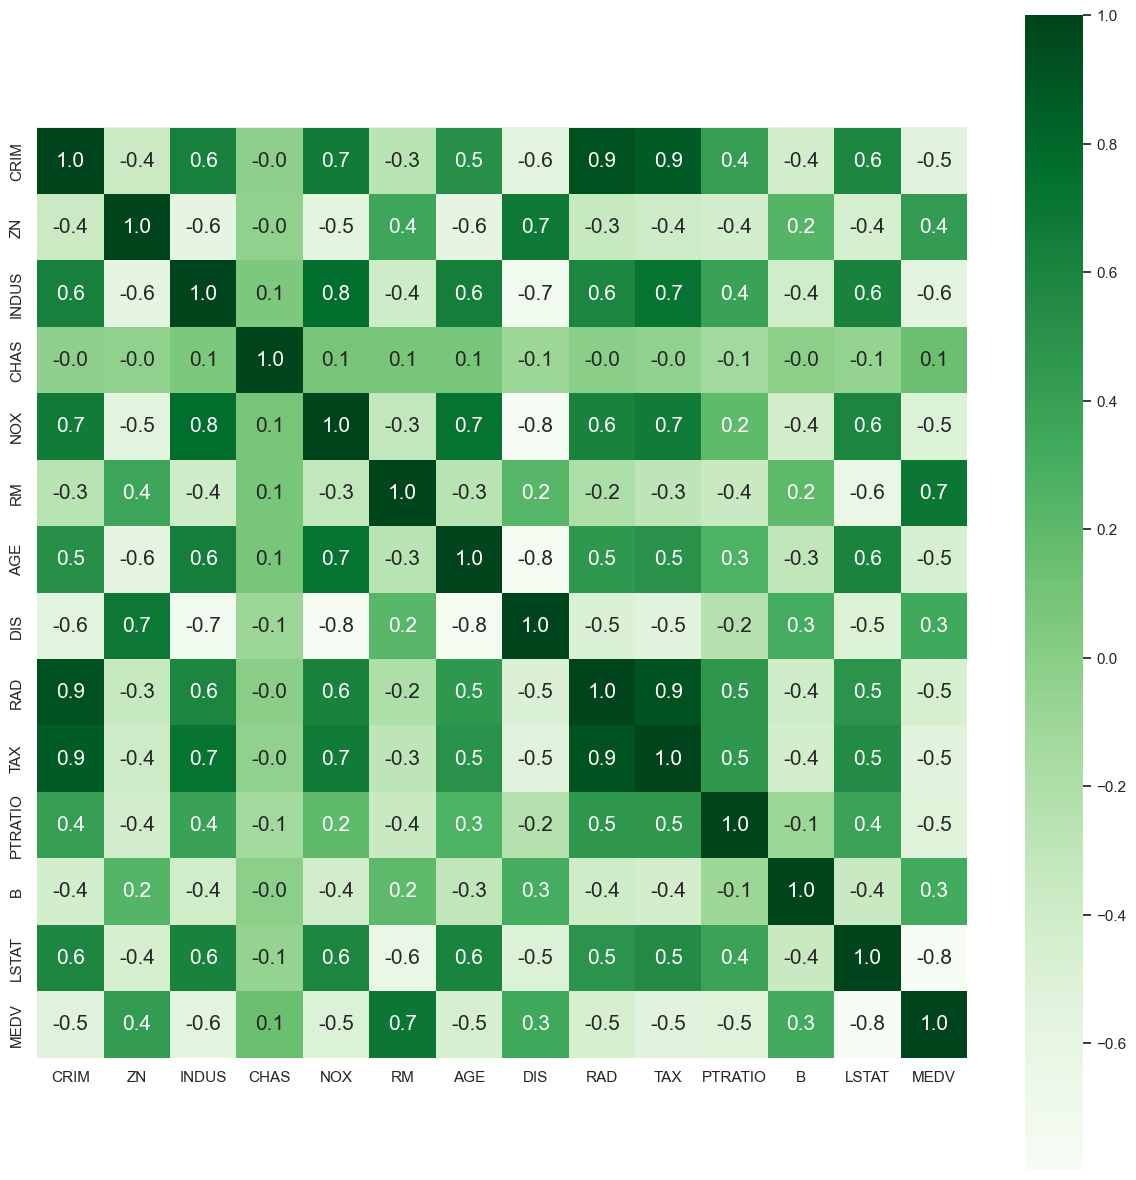

In [26]:
#Mencari korelasi antara variable
corr = data.corr()
corr.shape
#Buat plot untuk correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=True, square=True, fmt ='.1f', annot=True, annot_kws={'size': 15}, cmap='Greens')

# 3. Data Pre-Processing

Variabel dummy 'CHAS' dengan nilai 1 dan 0 tetap bertipe data integer, tidak dilakukan pengubahan menjadi tipe data objek (kategorikal) secara eksplisit. Ini karena representasi 1 dan 0 sebagai integer sudah cukup untuk keperluan variabel dummy biner.

**Pembagian data sebagai Variabel independen dan dependen**

In [27]:
X = data.drop(['MEDV'],axis=1)
y = data['MEDV']

In [28]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [29]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

**Split data menjadi train dan test set**

Data train dibagi menjadi 70% dan data test dibagi menjadi 30%

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=4)

In [31]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
84,0.050590,0.00,4.49,0,0.449,6.3890,48.0,4.7794,3,247.0,18.5,396.90000,9.62
354,0.043010,31.25,1.91,0,0.413,5.6630,21.9,9.8208,4,334.0,22.0,382.80000,8.05
221,0.407710,0.00,6.20,1,0.507,6.1640,91.3,3.0480,8,307.0,17.4,395.24000,21.46
34,1.612820,0.00,8.14,0,0.538,6.0960,96.9,3.7598,4,307.0,21.0,344.10625,20.34
267,0.578340,20.00,3.97,0,0.575,7.7305,67.0,2.4216,5,264.0,13.2,384.54000,7.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,9.069639,0.00,18.10,0,0.700,5.2770,98.1,1.4261,24,666.0,20.2,396.90000,30.81
197,0.046660,31.25,1.52,0,0.404,7.1070,36.6,7.3090,2,329.0,13.2,354.31000,8.61
439,9.069639,0.00,18.10,0,0.740,5.6270,93.9,1.8172,24,666.0,20.2,396.90000,22.88
174,0.084470,0.00,4.05,0,0.510,5.8590,68.7,2.7019,5,296.0,16.6,393.23000,9.64


In [32]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
8,0.211240,12.50,7.87,0,0.524,5.6310,100.0,6.0821,5,311.0,15.2,386.63000,29.93
289,0.042970,31.25,5.32,0,0.405,6.5650,22.9,7.3172,6,293.0,16.6,371.72000,9.51
68,0.135540,12.50,6.07,0,0.409,5.5940,36.8,6.4980,4,345.0,18.9,396.90000,13.09
211,0.375780,0.00,10.59,1,0.489,5.4040,88.6,3.6650,4,277.0,18.6,395.24000,23.98
226,0.382140,0.00,6.20,0,0.504,7.7305,86.5,3.2157,8,307.0,17.4,387.38000,3.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,6.288070,0.00,18.10,0,0.740,6.3410,96.4,2.0720,24,666.0,20.2,344.10625,17.79
364,3.474280,0.00,18.10,1,0.718,7.7305,82.9,1.9047,24,666.0,20.2,354.55000,5.29
337,0.030410,0.00,5.19,0,0.515,5.8950,59.6,5.6150,5,224.0,20.2,394.81000,10.56
39,0.027630,31.25,2.95,0,0.428,6.5950,21.8,5.4011,3,252.0,18.3,395.63000,4.32


In [33]:
y_train

84     23.9000
354    18.2000
221    21.7000
34     13.5000
267    36.9625
        ...   
385     7.2000
197    30.3000
439    12.8000
174    22.6000
122    20.5000
Name: MEDV, Length: 354, dtype: float64

In [34]:
y_test

8      16.5000
289    24.8000
68     17.4000
211    19.3000
226    36.9625
        ...   
446    14.9000
364    21.9000
337    18.5000
39     30.8000
478    14.6000
Name: MEDV, Length: 152, dtype: float64

# 4. Data Modelling dan Model Evaluation

In [35]:
#Prediksi secara statistik (menggunakan metode SPSS)
import statsmodels.api as sm

# Split the columns into y and x
y_ = y
X_ = X

# Define the model
X_ = sm.add_constant(X_)
model = sm.OLS(y_, X_)

# Fit the model
result = model.fit()

# Print the model summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     141.0
Date:                Thu, 04 Jan 2024   Prob (F-statistic):          1.82e-156
Time:                        19:48:16   Log-Likelihood:                -1351.1
No. Observations:                 506   AIC:                             2730.
Df Residuals:                     492   BIC:                             2789.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0959      5.419      6.476      0.0

## 4.1 Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

# Model Linear Regressor
lm = LinearRegression()

# Fit data ke model untuk di Training
lm.fit(X_train, y_train)

LinearRegression()

In [37]:
lm.intercept_ #titik potong(intersep atau bias) dari garis regresi.

37.72161681582859

**Linear Regression Model Evaluation**

In [38]:
# Bandingkan hasil prediksi dengan train data
y_pred = lm.predict(X_train)

lm adalah model regresi linear yang telah di fit atau dilatih menggunakan data train.

Model evaluation dilakukan untuk mengevaluasi seberapa baik model statistik atau machine learning dapat melakukan prediksi atau klasifikasi pada data uji (test). Beberapa metode evaluasi yang digunakan yaitu R-squared, MAE, MSE, dan RMSE.

In [39]:
print("R^2: ", metrics.r2_score(y_train, y_pred))
print("MAE: ", metrics.mean_absolute_error(y_train, y_pred))
print("MSE: ", metrics.mean_squared_error(y_train, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2:  0.7843001397120484
MAE:  2.612682060023276
MSE:  11.804083716350966
RMSE:  3.435707163940339


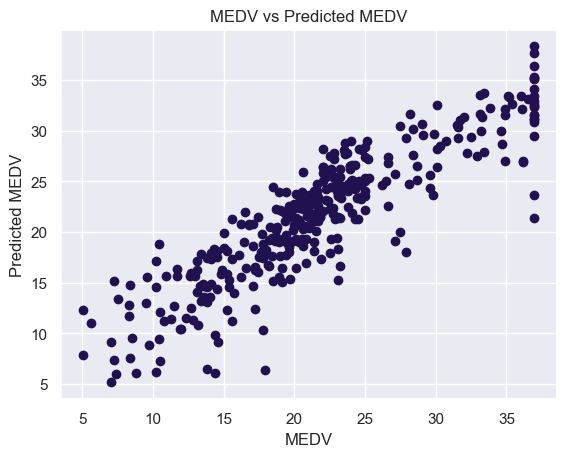

In [40]:
plt.scatter(y_train, y_pred)
plt.xlabel("MEDV")
plt.ylabel("Predicted MEDV")
plt.title("MEDV vs Predicted MEDV")
plt.show()

In [41]:
# Prediksi model dalam data uji (test)
y_pred = lm.predict(X_test)

In [42]:
# Model Evaluation Test
acc_linreg = metrics.r2_score(y_test, y_pred)
print("R^2: ", acc_linreg)
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2:  0.785864589916547
MAE:  2.775470070332819
MSE:  13.73346448170595
RMSE:  3.705868923978012


**Perbandingan dari Model Evaluation train dan test:**
* Model memiliki kinerja yang serupa baiknya pada data pelatihan dan data uji, karena nilai R^2 atau R-squared pada kedua set datanya hampir sama.
* MAE, MSE, dan RMSE pada data uji cenderung lebih sedikit tinggi dibandingkan dengan data pelatihan, tetapi selisihnya tidak signifikan.
* Model tidak mengalami overfitting dan underfitting yang signifikan, karena kinerjanya relatif stabil pada data pelatihan dan data uji.

## 4.2 Random Forest Regressor

In [43]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets
reg.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
# Model prediction on train data
y_pred = reg.predict(X_train)

**Random Forest Regressor model evaluation**

In [45]:
# Model evaluation
print('R^2: ', metrics.r2_score(y_train, y_pred))
print('MAE: ', metrics.mean_absolute_error(y_train, y_pred))
print('MSE: ', metrics.mean_squared_error(y_train, y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2:  0.9813936464937282
MAE:  0.7363213276836135
MSE:  1.0182248340395461
RMSE:  1.0090712730226474


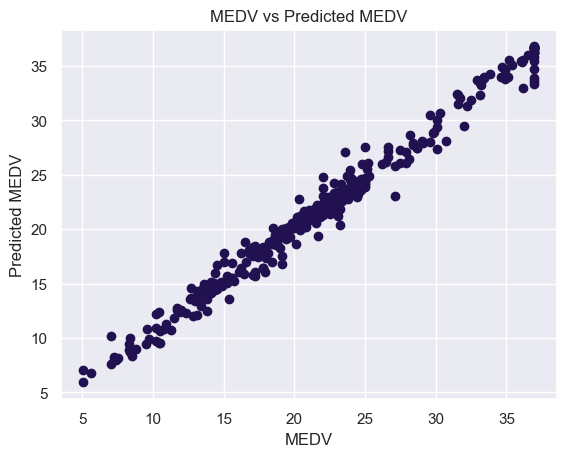

In [46]:
# Visualizing the differences between actual MEDV and predicted MEDV values
plt.scatter(y_train, y_pred)
plt.xlabel("MEDV")
plt.ylabel("Predicted MEDV")
plt.title("MEDV vs Predicted MEDV")
plt.show()

In [47]:
# Predicting test data with the model
y_test_pred = reg.predict(X_test)

In [48]:
#Model evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print("MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("MSE: ", metrics. mean_squared_error(y_test, y_test_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8585089604507046
MAE:  2.0182006578947327
MSE:  9.074455109374993
RMSE:  3.012383625864241


* Model memiliki kinerja yang sangat baik pada data pelatihan, dan kemampuannya untuk menggeneralisasi ke data uji (test) juga cukup baik.
* Meskipun terdapat peningkatan dalam kesalahan prediksi pada data uji, nilai MAE dan RMSE masih dalam rentang yang dapat diterima, terutama jika mempertimbangkan kompleksitas data atau kondisi khusus masalah.

## 4.3 XGBoost (Ensemble Model)

In [49]:
from xgboost import XGBRegressor

reg = XGBRegressor()

reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
# Prediksi model dalam data
y_pred = reg.predict(X_train)

**XGBoost Model Evaluation**

In [51]:
print("R^2: ", metrics.r2_score(y_train, y_pred))
print("MAE: ", metrics.mean_absolute_error(y_train, y_pred))
print("MSE: ", metrics.mean_squared_error(y_train, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2:  0.9999987170376842
MAE:  0.005757531203792709
MSE:  7.020957065638508e-05
RMSE:  0.008379115147578834


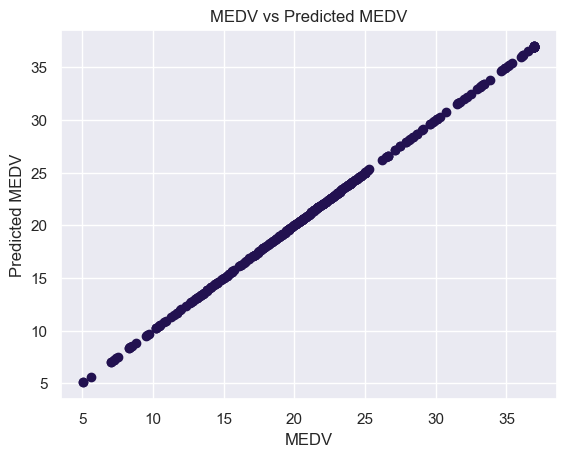

In [52]:
# Visualizing the differences between actual MEDV and predicted MEDV values
plt.scatter(y_train, y_pred)
plt.xlabel("MEDV")
plt.ylabel("Predicted MEDV")
plt.title("MEDV vs Predicted MEDV")
plt.show()

In [53]:
# Prediksi hasil test
y_test_pred = reg.predict(X_test)

In [54]:
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print("R^2: ", acc_xgb)
print("MAE: ", metrics.mean_absolute_error(y_train, y_pred))
print("MSE: ", metrics.mean_squared_error(y_train, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2:  0.868618372638429
MAE:  0.005757531203792709
MSE:  7.020957065638508e-05
RMSE:  0.008379115147578834


* Model memiliki kinerja yang sangat baik pada data pelatihan dan mampu menggeneralisasi dengan sangat baik ke data uji.
* Kesalahan prediksi yang sangat kecil pada kedua set data menunjukkan bahwa model memiliki tingkat presisi yang sangat tinggi dan dapat diandalkan dalam memprediksi nilai variabel dependen.

## 4.4 DataFrame models

In [55]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,86.861837
1,Random Forest,85.850896
0,Linear Regression,78.586459


* XGBoost dan Random Forest menunjukkan model yang baik dibandingkan Linear Regression berdasarkan R-squared score.
* R-squared score yang tinggi pada kedua model tersebut (86.86% untuk XGBoost dan 85.51% untuk Random Forest) menandakan bahwa keduanya memiliki kemampuan yang baik untuk menjelaskan variasi dalam data.